<a href="https://colab.research.google.com/github/vovsiienko/IT496_Course_acitvities/blob/master/ViktoriiaO_Radar_Spider_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import math

#create a dataframe for our alternative analysis matrix
AA=pd.DataFrame(columns=['criteria', 'weight', 'ratingA', 'ratingB', 'scoreA', 'scoreB'])
print(AA)

Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, scoreA, scoreB]
Index: []


In [5]:
#first step :add a list of criteria
AA['criteria']=['risk', 'ROI', 'customerSatisfaction', 'feasibility', 'strategicAlignment']
print(AA)

               criteria weight ratingA ratingB scoreA scoreB
0                  risk    NaN     NaN     NaN    NaN    NaN
1                   ROI    NaN     NaN     NaN    NaN    NaN
2  customerSatisfaction    NaN     NaN     NaN    NaN    NaN
3           feasibility    NaN     NaN     NaN    NaN    NaN
4    strategicAlignment    NaN     NaN     NaN    NaN    NaN


In [6]:
#second step: identify weights
#weights show relative importance of each criterion
#they must add up to 1 (or 100 if you use percentages)
AA['weight']=[0.1,0.15,0.3,.15,.3]
print(AA)

               criteria  weight ratingA ratingB scoreA scoreB
0                  risk    0.10     NaN     NaN    NaN    NaN
1                   ROI    0.15     NaN     NaN    NaN    NaN
2  customerSatisfaction    0.30     NaN     NaN    NaN    NaN
3           feasibility    0.15     NaN     NaN    NaN    NaN
4    strategicAlignment    0.30     NaN     NaN    NaN    NaN


In [8]:
from pandas.core.indexes.range import RangeIndex
#step 3: rate each alternative across all criteria
#choose a scale: 1-5 or 1-7 or 1-10
#higher number: al alternative is doing better regarding a given criterion

AA['ratingA']=[4,1,2,1,5]
AA['ratingB']=[3,4,2,3,2]
print(AA)

               criteria  weight  ratingA  ratingB scoreA scoreB
0                  risk    0.10        4        3    NaN    NaN
1                   ROI    0.15        1        4    NaN    NaN
2  customerSatisfaction    0.30        2        2    NaN    NaN
3           feasibility    0.15        1        3    NaN    NaN
4    strategicAlignment    0.30        5        2    NaN    NaN


In [12]:
#step 4: calculate partial score by multiplying weight * rating
for index, row in AA.iterrows():
  AA['scoreA'][index]=row['ratingA']*row['weight']
  AA['scoreB'][index]=row['ratingB']*row['weight']
print(AA)

               criteria  weight  ratingA  ratingB  scoreA scoreB
0                  risk    0.10        4        3    0.40    0.3
1                   ROI    0.15        1        4    0.15    0.6
2  customerSatisfaction    0.30        2        2    0.60    0.6
3           feasibility    0.15        1        3    0.15   0.45
4    strategicAlignment    0.30        5        2    1.50    0.6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
#step 5: add parttial scores to get the total scores
#which solution is the winner? The one with the highest total score

totalScoreA=0
totalScoreB=0

for index,row in AA.iterrows():
  totalScoreA+=row['scoreA']
  totalScoreB+=row['scoreB']

print('the total score for A is {:.2f} and for B is {:2f}'.format(totalScoreA, totalScoreB))


the total score for A is 2.80 and for B is 2.550000


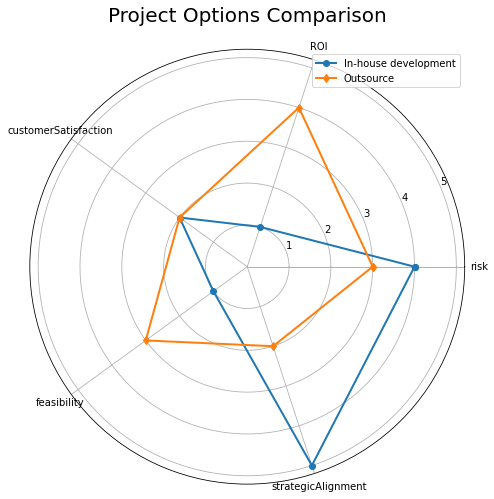

In [15]:
import numpy as np
import matplotlib.pyplot as plt

axisLocations = np.linspace(start=0, stop=2*np.pi, num=len(AA['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA=AA['ratingA']
ratingsB=AA['ratingB']

ratingsACircular=np.concatenate((ratingsA,[ratingsA[0]]))
ratingsBCircular=np.concatenate((ratingsB,[ratingsB[0]]))

plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(axisLocations, ratingsACircular, 'o-', linewidth=2, label="In-house development")
plt.plot(axisLocations, ratingsBCircular, 'd-', linewidth=2, label="Outsource")
#plt.plot(label_loc, restarant_3, laber='Restaurant 3)
plt.title('Project Options Comparison', size=20)
lines,labels=plt.thetagrids(np.degrees(axisLocations), labels=AA['criteria'])
plt.legend()
plt.show()